# Initial Value Problems - Project

![Initial condition of firework with FBD and sum of momentum](../images/firework.png)

You are going to end this module with a __bang__ by looking at the
flight path of a firework. Shown above is the initial condition of a
firework, the _Freedom Flyer_ in (a), its final height where it
detonates in (b), the applied forces in the __Free Body Diagram (FBD)__
in (c), and the __momentum__ of the firework $m\mathbf{v}$ and the
propellent $dm \mathbf{u}$ in (d). 

The resulting equation of motion is that the acceleration is
proportional to the speed of the propellent and the mass rate change
$\frac{dm}{dt}$ as such

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt} -mg - cv^2.~~~~~~~~(1)
\end{equation}$$

If you assume that the acceleration and the propellent momentum are much
greater than the forces of gravity and drag, then the equation is
simplified to the conservation of momentum. A further simplification is
that the speed of the propellant is constant, $u=constant$, then the
equation can be integrated to obtain an analytical rocket equation
solution of [Tsiolkovsky](https://www.math24.net/rocket-motion/) [1,2], 

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt}~~~~~(2.a)
\end{equation}$$

$$\begin{equation}
\frac{m_{f}}{m_{0}}=e^{-\Delta v / u},~~~~~(2.b) 
\end{equation}$$

where $m_f$ and $m_0$ are the mass at beginning and end of flight, $u$
is the speed of the propellent, and $\Delta v=v_{final}-v_{initial}$ is
the change in speed of the rocket from beginning to end of flight.
Equation 2.b only relates the final velocity to the change in mass and
propellent speed. When you integrate Eqn 2.a, you will have to compare
the velocity as a function of mass loss. 

Your first objective is to integrate a numerical model that converges to
equation (2.b), the Tsiolkovsky equation. Next, you will add drag and
gravity and compare the results _between equations (1) and (2)_.
Finally, you will vary the mass change rate to achieve the desired
detonation height.

__1.__ Create a `simplerocket` function that returns the velocity, $v$,
the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a
function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using
eqn (2.a). Where the mass rate change $\frac{dm}{dt}$ and the propellent
speed $u$ are constants. The average velocity of gun powder propellent
used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = \left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt} \\ \frac{dm}{dt} \end{array}\right]$

Use [an integration method](../module_03/03_Get_Oscillations) to
integrate the `simplerocket` function. Demonstrate that your solution
converges to equation (2.b) the Tsiolkovsky equation. Use an initial
state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s. 

> __Hint__: your integrated solution will have a current mass that you can
> use to create $\frac{m_{f}}{m_{0}}$ by dividing state[2]/(initial mass),
> then your plot of velocity(t) vs mass(t)/mass(0) should match
> Tsiolkovsky's
> 
> $\log\left(\frac{m_{f}}{m_{0}}\right) =
> \log\left(\frac{state[2]}{0.25~kg}\right) 
> = \frac{state[1]}{250~m/s} = \frac{-\Delta v+error}{u}$ 
> where $error$ is the difference between your integrated state variable
> and the Tsiolkovsky analytical value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
g = 9.81 
c = 0    

u = 250 
dmdt = 0.05

def simplerocket(state,dmdt=0.05, u=250):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, without drag or gravity, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    
    dstate = np.zeros(np.shape(state))
    y, v, m = state  #Unpack the state vector
    dv_dt = (u * dmdt) / m - g - (c / m) * v**2  # The acceleration of the rocket
    dmdt = -dmdt  #The rate of change of mass is negative because mass is being lost
    dstate = np.array([v, dv_dt, dmdt]) 
    
    return dstate 

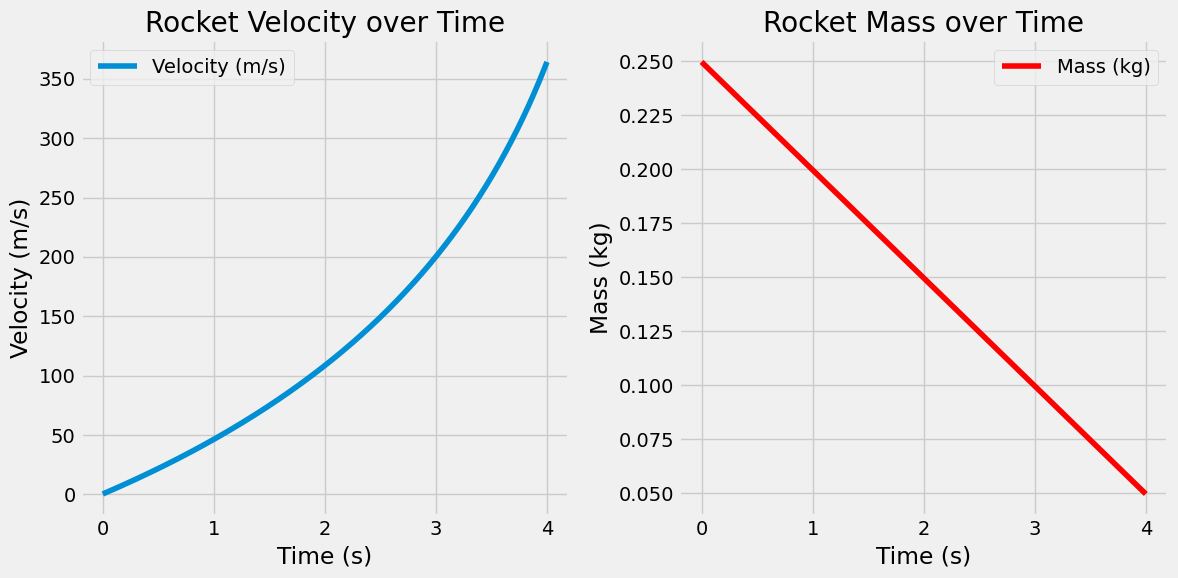

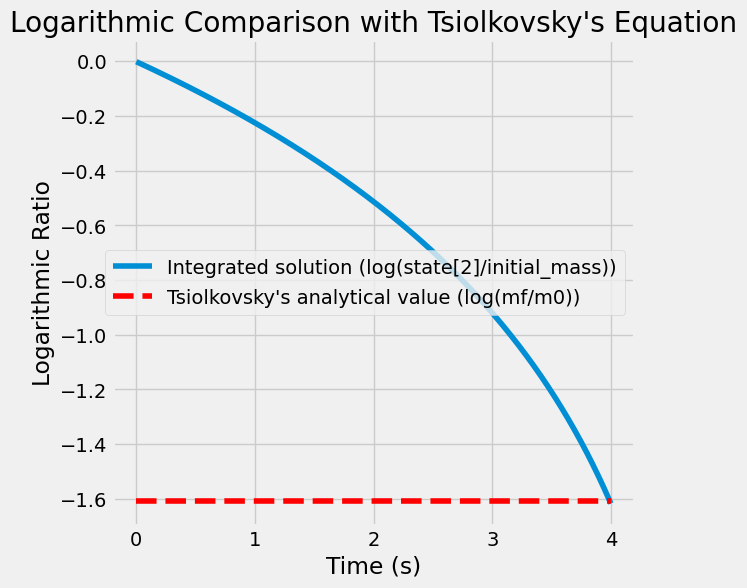

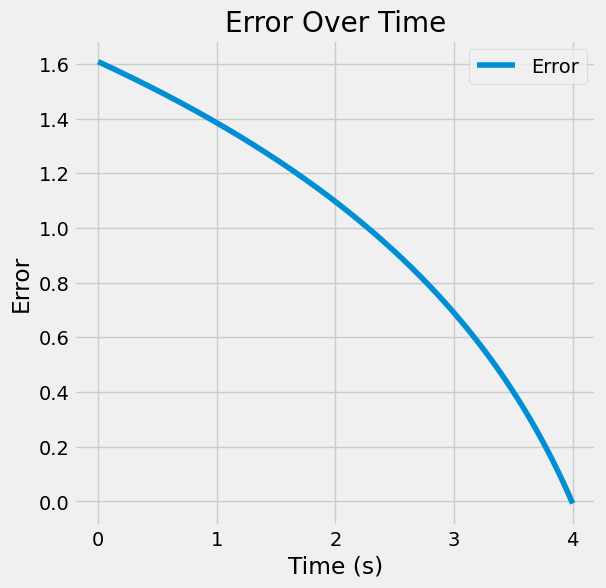

Max error:  1.6078334195106616


In [3]:
y0 = 0
v0 = 0
m0=0.25
mf=0.05
dmdt=0.05
t = np.linspace(0,(m0-mf)/dmdt,500)
dt=t[1]-t[0]

state = np.array([y0, v0, m0])  #Initial state vector
states = []

for _ in t:
    #Compute the derivatives
    derivatives = simplerocket(state, dmdt, u)
    #Update the state
    state = state + derivatives * dt
    #Save the state
    states.append(state)

states = np.array(states)

#Extract the position, velocity, and mass
y = states[:, 0]
v = states[:, 1]
m = states[:, 2]

#Plotting
plt.figure(figsize=(12, 6))

#Plot velocity vs time
plt.subplot(1, 2, 1)
plt.plot(t, v, label='Velocity (m/s)')
plt.title('Rocket Velocity over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()

#Plot mass vs time
plt.subplot(1, 2, 2)
plt.plot(t, m, label='Mass (kg)', color='r')
plt.title('Rocket Mass over Time')
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')
plt.legend()

plt.tight_layout()
plt.show()

#Logarithmic comparison for Tsiolkovsky's equation validation
log_ratio_calculated = np.log(m / m0)
log_ratio_analytical = np.log(mf / m0) * np.ones_like(t)  # constant analytical value

#Plot log(mf/m0) vs log(state[2]/initial_mass)
plt.figure(figsize=(6, 6))
plt.plot(t, log_ratio_calculated, label='Integrated solution (log(state[2]/initial_mass))')
plt.plot(t, log_ratio_analytical, 'r--', label="Tsiolkovsky's analytical value (log(mf/m0))")
plt.title('Logarithmic Comparison with Tsiolkovsky\'s Equation')
plt.xlabel('Time (s)')
plt.ylabel('Logarithmic Ratio')
plt.legend()
plt.show()

#Calculate error between integrated solution and Tsiolkovsky's equation
error = log_ratio_calculated - log_ratio_analytical

#Plot error over time
plt.figure(figsize=(6, 6))
plt.plot(t, error, label='Error')
plt.title('Error Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.legend()
plt.show()

#Output the maximum error
max_error = np.max(np.abs(error))
print("Max error: ",max_error)

__2.__ You should have a converged solution for integrating `simplerocket`. Now, create a more relastic function, `rocket` that incorporates gravity and drag and returns the velocity, $v$, the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using eqn (1). Where the mass rate change $\frac{dm}{dt}$ and the propellent speed $u$ are constants. The average velocity of gun powder propellent used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = 
\left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt}-g-\frac{c}{m}v^2 \\ \frac{dm}{dt} \end{array}\right]$

Use [two integration methods](../notebooks/03_Get_Oscillations.ipynb) to integrate the `rocket` function, one explicit method and one implicit method. Demonstrate that the solutions converge to equation (2.b) the Tsiolkovsky equation. Use an initial state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s, . 

Compare solutions between the `simplerocket` and `rocket` integration, what is the height reached when the mass reaches $m_{f} = 0.05~kg?$

In [4]:
def rocket(state,dmdt=0.05, u=250,c=0.18e-3):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    c : drag constant for a rocket set to 0.18e-3 kg/m
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    g=9.81
    dstate = np.zeros(np.shape(state))
    y, v, m = state  #Unpack the state vector
    dv_dt = (u * dmdt) / m - g - (c / m) * v**2 
    dm_dt = -dmdt
    dstate = np.array([v, dv_dt, dmdt])
    
    return dstate

In [5]:
y0 = 0 
v0 = 0  
m0 = 0.25  
mf = 0.05 

#Time setup for integration
time_to_burn = (m0-mf) / dmdt
t = np.linspace(0, time_to_burn, 500)
dt = t[1] - t[0] 

#Integrate the equations using two methods: Euler (explicit) and Improved Euler (implicit)
#Initialize arrays to store the states for both methods
states_explicit = []
states_implicit = []

#Set initial state
state_explicit = state_implicit = np.array([y0, v0, m0])

#Euler method (explicit)
for _ in t:
    derivatives = rocket(state_explicit, dmdt, u, c)
    state_explicit = state_explicit + derivatives * dt
    states_explicit.append(state_explicit)

#Improved Euler method (implicit)
for _ in t:
    derivatives = rocket(state_implicit, dmdt, u, c)
    #Predict the next state
    state_pred = state_implicit + derivatives * dt
    #Compute derivatives for the predicted state
    derivatives_pred = rocket(state_pred, dmdt, u, c)
    #Correct the state using the average of the derivatives
    state_implicit = state_implicit + 0.5 * (derivatives + derivatives_pred) * dt
    states_implicit.append(state_implicit)

states_explicit = np.array(states_explicit)
states_implicit = np.array(states_implicit)

#Extract the position (height) for both methods
y_explicit = states_explicit[:, 0]
y_implicit = states_implicit[:, 0]

#Find the height reached when the mass reaches mf for both methods
height_explicit = y_explicit[-1]
height_implicit = y_implicit[-1]

print("Explicit Euler method: ",height_explicit)
print("Improved (implcit) Euler method: ", height_implicit)
'''The results are pretty close, telling us that both methods provide a reliable and consistent solution.'''

Explicit Euler method:  244.68465787021907
Improved (implcit) Euler method:  244.90428687532778


'The results are pretty close, telling us that both methods provide a reliable and consistent solution.'

__3.__ Solve for the mass change rate that results in detonation at a height of 300 meters. Create a function `f_dm` that returns the final height of the firework when it reaches $m_{f}=0.05~kg$. The inputs should be 

$f_{m}= f_{m}(\frac{dm}{dt},~parameters)$

where $\frac{dm}{dt}$ is the variable you are using to find a root and $parameters$ are the known values, `m0=0.25, c=0.18e-3, u=250`. When $f_{m}(\frac{dm}{dt}) = 0$, you have found the correct root. 

Plot the height as a function of time and use a star to denote detonation at the correct height with a `'*'`-marker

Approach the solution in two steps, use the incremental search
[`incsearch`](../module_03/04_Getting_to_the_root) with 5-10
sub-intervals _limit the number of times you call the
function_. Then, use the modified secant method to find the true root of
the function.

a. Use the incremental search to find the two closest mass change rates within the interval $\frac{dm}{dt}=0.05-0.4~kg/s.$

b. Use the modified secant method to find the root of the function $f_{m}$.

c. Plot your solution for the height as a function of time and indicate the detonation with a `*`-marker.

In [6]:
m0 = 0.25  
c = 0.18e-3  
u = 250  
height_desired = 300

def f_dm(dmdt, m0 = 0.25, c = 0.18e-3, u = 250, height_desired=300):
    ''' define a function f_dm(dmdt) that returns 
    height_desired-height_predicted[-1]
    here, the time span is based upon the value of dmdt
    
    arguments:
    ---------
    dmdt: the unknown mass change rate
    m0: the known initial mass
    c: the known drag in kg/m
    u: the known speed of the propellent
    
    returns:
    --------
    error: the difference between height_desired and height_predicted[-1]
        when f_dm(dmdt) = 0, the correct mass change rate was chosen
    '''
    height_desired=300
    
    time_to_burn = m0 / dmdt
    t = np.linspace(0, time_to_burn, 500)  # array of time values
    dt = t[1] - t[0]  # time step
    
    # Initial state
    state = np.array([0, 0, m0])  # initial state vector [position, velocity, mass]
    
    # Integrate the rocket equation over time
    for _ in t:
        derivatives = rocket(state, dmdt, u, c)
        state = state + derivatives * dt
    
    # Final predicted height
    height_predicted = state[0]
    
    # Error in final height
    error = height_desired - height_predicted
    
    return error

In [7]:
def incsearch(func, x1, x2, m0, c, u, height_desired, sub_intervals):
    '''
    Perform an incremental search for the root of the function between x1 and x2.
    The search is performed in sub_intervals within the given range.
    '''
    x = np.linspace(x1, x2, sub_intervals)
    signs = np.sign([func(dm, m0, c, u, height_desired) for dm in x])
    sign_changes = np.where(np.diff(signs))[0]
    
    # Return the pair of x where the sign change occurs
    if len(sign_changes) == 0:
        return None, None
    else:
        return x[sign_changes[0]], x[sign_changes[0]+1]
    

In [8]:
def mod_secant(func,dx,x0,es=0.0001,maxit=50, *params):
    '''mod_secant: Modified secant root location zeroes
    root,[fx,ea,iter]=mod_secant(func,dfunc,xr,es,maxit,p1,p2,...):
    uses modified secant method to find the root of func
    arguments:
    ----------
    func = name of function
    dx = perturbation fraction
    xr = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by function
    returns:
    --------
    root = real root
    fx = func evaluated at root
    ea = approximate relative error ( )
    iter = number of iterations'''

    iter = 0
    xr = x0
    for iter in range(maxit):
        xrold = xr
        dfun = (func(xr+dx, *params)-func(xr, *params))/dx
        xr = xr - func(xr, *params)/dfun
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100
        else:
            ea = abs((xr - xrold)/1) * 100
        if ea < es:
            break
    return xr, func(xr, *params), ea, iter

In [9]:
#Part a
x1, x2 = incsearch(f_dm, 0.05, 0.4, m0, c, u, height_desired, 10)  # using 10 sub-intervals
print("Closest mass change rates: ", x1, ",", x2)

Closest mass change rates:  0.05 , 0.08888888888888889


In [10]:
#Part b
dm_dt_root, f_at_root, ea, iter = mod_secant(f_dm, 0.0001, (x1+x2)/2, 0.0001, 50, m0, c, u, height_desired)
print("The root of the function is approximately: ", dm_dt_root, "kg/s")

The root of the function is approximately:  0.06075263731525148 kg/s


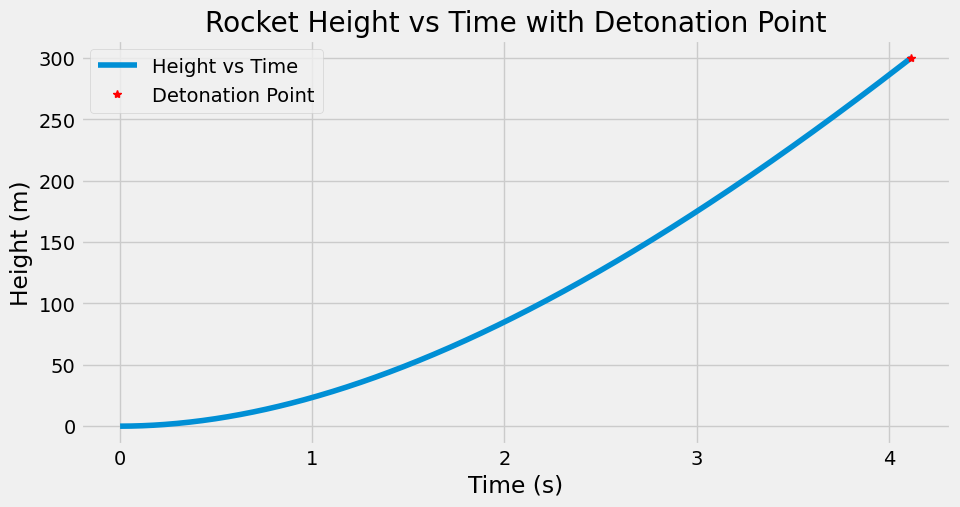

In [11]:
#Part c

#Time setup for integration with the found dm_dt_root
time_to_burn = m0 / dm_dt_root
t = np.linspace(0, time_to_burn, 500)  # array of time values
dt = t[1] - t[0]  # time step

#Integrate the rocket equation over time with the found dm_dt_root
states = np.array([0, 0, m0])  # initial state vector [position, velocity, mass]
heights = []

for ti in t:
    derivatives = rocket(states, dm_dt_root, u, c)
    states = states + derivatives * dt
    heights.append(states[0])

#Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, heights, label='Height vs Time')
plt.plot(time_to_burn, height_desired, 'r*', label='Detonation Point')
plt.title('Rocket Height vs Time with Detonation Point')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend()
plt.show()

## References

1. Math 24 _Rocket Motion_. <https://www.math24.net/rocket-motion/\>

2. Kasdin and Paley. _Engineering Dynamics_. [ch 6-Linear Momentum of a Multiparticle System pp234-235](https://www.jstor.org/stable/j.ctvcm4ggj.9) Princeton University Press 

3. <https://en.wikipedia.org/wiki/Specific_impulse>

4. <https://www.apogeerockets.com/Rocket_Motors/Estes_Motors/13mm_Motors/Estes_13mm_1_4A3-3T>